In [1]:
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance

In [2]:
ss= StandardScaler()

In [3]:
import numpy as np

In [4]:
X_train = np.array([[ 1., -1.,  2.],
                   [ 2.,  0.,  0.],
                   [ 0.,  1., -1.]])

In [5]:
X_train

array([[ 1., -1.,  2.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.]])

In [11]:
tf = ss.fit_transform(X_train)
tf

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [7]:
tf[:,0].std()

0.9999999999999999

# Min MAx Scallar Transform Scales the values from 0 to 1 

# OR Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
minmax = MinMaxScaler()

In [10]:
minmax.fit_transform(X_train)

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

# Handling Outliers

In [12]:
from sklearn.datasets import make_blobs

In [13]:
features, col = make_blobs(centers=1, cluster_std=0.90)
features[10,1] = 10
features[10,0] = 10
features

array([[ 8.60834855e+00,  1.93400614e-02],
       [ 8.00459461e+00, -1.20674051e+00],
       [ 6.84289466e+00,  1.26698880e+00],
       [ 7.37254521e+00, -6.73087500e-01],
       [ 5.85200802e+00,  2.70349147e-01],
       [ 7.84827728e+00, -2.15377559e-01],
       [ 6.79600703e+00, -1.47325967e+00],
       [ 6.86064988e+00, -2.82870926e-01],
       [ 6.22078724e+00,  1.20166107e+00],
       [ 7.47767141e+00, -9.83759920e-01],
       [ 1.00000000e+01,  1.00000000e+01],
       [ 7.99911545e+00, -1.24284852e+00],
       [ 8.63701022e+00,  1.29346039e+00],
       [ 8.16889583e+00,  3.84488328e-01],
       [ 7.89065037e+00,  4.57329948e-02],
       [ 9.52041137e+00, -2.73806858e-01],
       [ 7.43961445e+00,  5.88709770e-01],
       [ 6.28142574e+00,  9.73822341e-01],
       [ 7.11418957e+00,  9.37361971e-02],
       [ 6.75197466e+00,  6.46169832e-01],
       [ 6.45074736e+00, -5.04228554e-01],
       [ 5.52829912e+00,  7.83930905e-01],
       [ 8.16141667e+00,  3.25172814e-01],
       [ 7.

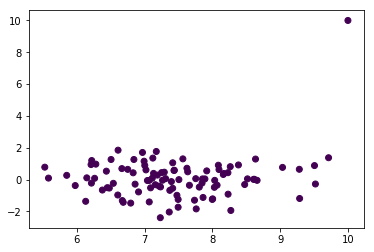

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(features[:,0],features[:,1], c=col)

In [15]:
from sklearn.covariance import EllipticEnvelope
env = EllipticEnvelope(contamination=0.05)


In [19]:
env.fit(features)
c = env.predict(features)

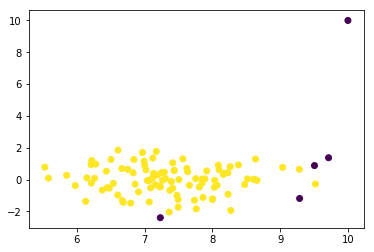

In [20]:
plt.scatter(features[:,0],features[:,1],c=c)

In [21]:
measurements = [
    {'city': 'Dubai', 'temperature': 33.},
    {'city': 'London', 'temperature': 12.},
    {'city': 'San Francisco', 'temperature': 18.},
]

In [22]:
measurements

[{'city': 'Dubai', 'temperature': 33.0},
 {'city': 'London', 'temperature': 12.0},
 {'city': 'San Francisco', 'temperature': 18.0}]

In [24]:
import pandas as pd
df = pd.DataFrame(measurements)
df

,city,temperature
0,Dubai,33.0
1,London,12.0
2,San Francisco,18.0


DictVectorizer can be used to convert feature arrays represented as lists of standard Python dict objects to the NumPy/SciPy representation

In [25]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer()

In [26]:
dv.fit(measurements)

DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=True)

In [27]:
dv.transform(measurements).toarray()

array([[ 1.,  0.,  0., 33.],
       [ 0.,  1.,  0., 12.],
       [ 0.,  0.,  1., 18.]])

In [28]:
dv.get_feature_names()

['city=Dubai', 'city=London', 'city=San Francisco', 'temperature']

In [29]:
measurements

[{'city': 'Dubai', 'temperature': 33.0},
 {'city': 'London', 'temperature': 12.0},
 {'city': 'San Francisco', 'temperature': 18.0}]

In [30]:
new_measurements = [
    {'city': 'Dubai', 'temperature': 33.},
    {'city': 'London', 'temperature': 12.},
    {'city': 'London', 'temperature': 18.},
    {'city': 'Bangalore', 'temperature': 18.},
]

dv.transform(new_measurements).toarray()

array([[ 1.,  0.,  0., 33.],
       [ 0.,  1.,  0., 12.],
       [ 0.,  1.,  0., 18.],
       [ 0.,  0.,  0., 18.]])

In [31]:
df.to_dict(orient='records')

[{'city': 'Dubai', 'temperature': 33.0},
 {'city': 'London', 'temperature': 12.0},
 {'city': 'San Francisco', 'temperature': 18.0}]

In [32]:
new_df = pd.DataFrame(new_measurements)
new_df

,city,temperature
0,Dubai,33.0
1,London,12.0
2,London,18.0
3,Bangalore,18.0


In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
le.fit(new_df.city)

LabelEncoder()

In [39]:
#le.transform(df.city)

In [40]:
corpus = [
     'This is the first document awesome food.',
     'This is the second second document.',
     'And the third one the is mission impossible.',
     'Is this the first document?',
]

In [43]:
df = pd.DataFrame({'text': corpus,'sentiment':[0,1,1,0]})
df

,text,sentiment
0,This is the first document awesome food.,0
1,This is the second second document.,1
2,And the third one the is mission impossible.,1
3,Is this the first document?,0


In [44]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

In [45]:
cv.fit(df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [46]:
cv.get_feature_names()

['awesome', 'document', 'food', 'impossible', 'mission', 'second']

In [48]:
cv.transform(df.text).toarray()

array([[1, 1, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 2],
       [0, 0, 0, 1, 1, 0],
       [0, 1, 0, 0, 0, 0]], dtype=int64)

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

In [50]:
tfidfv = TfidfVectorizer(stop_words='english')

In [51]:
np.round(tfidfv.fit_transform(df.text).toarray(),2)

array([[0.64, 0.41, 0.64, 0.  , 0.  , 0.  ],
       [0.  , 0.3 , 0.  , 0.  , 0.  , 0.95],
       [0.  , 0.  , 0.  , 0.71, 0.71, 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  ]])

In [52]:

tfidfv.get_feature_names()

['awesome', 'document', 'food', 'impossible', 'mission', 'second']

In [53]:
tfidft = TfidfTransformer()

In [54]:
np.round(tfidft.fit_transform(cv.transform(df.text)).toarray(),2)

array([[0.64, 0.41, 0.64, 0.  , 0.  , 0.  ],
       [0.  , 0.3 , 0.  , 0.  , 0.  , 0.95],
       [0.  , 0.  , 0.  , 0.71, 0.71, 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  ]])

In [55]:
from  sklearn.preprocessing import FunctionTransformer

In [56]:
ft = FunctionTransformer(func=lambda x:x+2)

In [57]:
ft.fit_transform(df[['sentiment']])

C:\Users\pulkit.goel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\Users\pulkit.goel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


array([[2],
       [3],
       [3],
       [2]], dtype=int64)

In [58]:
df.sentiment

0    0
1    1
2    1
3    0
Name: sentiment, dtype: int64